<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [13]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Define the Network

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Batch Normalization  - Regularization Technique 
4. Dropout              - Regularization Technique 
5. Maxpool after 3 Layers 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. Linear Layer 

Special Considerations
========================
1. The Maxpool layers are placed such a way that the receptive field is 7 x 7 or 9 x9 (Ideally for imagenet type of images 11 x 11 is better) . But MNIST is a easy dataset so 7 x 7 should be good enough

2. No ReLu, BN or Dropout towards the end of the netowrk (Target prediction zone)

3. As less parameter as possible (near to the lower limit of 12000)
4. Dropout of 0.069 - As asked
5. Rotation of -5% - 5 %
6. Normalization
7. Batch size of 128 



In [14]:
from model import Net
#dropout_prob=0.069

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [15]:
from model import print_model_summary
dropout_prob = 0.069
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize)
# from torchsummary import summary
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# model = Net(dropout_prob=0.069).to(device)
# summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
         Dropout2d-8           [-1, 16, 28, 28]               0
         MaxPool2d-9           [-1, 16, 14, 14]               0
           Conv2d-10           [-1, 24, 14, 14]           3,456
             ReLU-11           [-1, 24, 14, 14]               0
      BatchNorm2d-12           [-1, 24, 14, 14]              48
        Dropout2d-13           [-1, 24, 14, 14]               0
           Conv2d-14           [-1, 16,

G:\TSAI-ERA\MNIST_99.4_Accuracy_12k Parameters\Part-2\model.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
2. Ensure that all requirements are fulfiiled
    - Random ROtation
    - Fill
    - Normalize


In [16]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = get_train_loader(batch_size, kwargs)

test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 
2. Iterate over the training sample based on the defined batch size
3. Validate on test dataset
4. Capture outcome in the list

In [17]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []


   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Validate 
4. Print the result

In [18]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


# model = Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)

    
#     train(model, device, train_loader, optimizer, epoch)
#     test(model, device, test_loader)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.1358441859483719 Batch_id=468 Accuracy=86.33: 100%|███████████████████████████| 469/469 [01:12<00:00,  6.51it/s]



Test set: Average loss: 0.0569, Accuracy: 9840/10000 (98.40%)

Currently Executing Epoch: 2


Loss=0.08169911056756973 Batch_id=468 Accuracy=97.08: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.57it/s]



Test set: Average loss: 0.0417, Accuracy: 9866/10000 (98.66%)

Currently Executing Epoch: 3


Loss=0.06112154200673103 Batch_id=468 Accuracy=97.81: 100%|██████████████████████████| 469/469 [01:12<00:00,  6.46it/s]



Test set: Average loss: 0.0294, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 4


Loss=0.05986931920051575 Batch_id=468 Accuracy=98.09: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.53it/s]



Test set: Average loss: 0.0270, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 5


Loss=0.02401156723499298 Batch_id=468 Accuracy=98.31: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.28it/s]



Test set: Average loss: 0.0262, Accuracy: 9911/10000 (99.11%)

Currently Executing Epoch: 6


Loss=0.12531009316444397 Batch_id=468 Accuracy=98.48: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.52it/s]



Test set: Average loss: 0.0228, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 7


Loss=0.1358746439218521 Batch_id=468 Accuracy=98.74: 100%|███████████████████████████| 469/469 [01:12<00:00,  6.49it/s]



Test set: Average loss: 0.0189, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 8


Loss=0.12351590394973755 Batch_id=468 Accuracy=98.84: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.54it/s]



Test set: Average loss: 0.0189, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 9


Loss=0.07895346730947495 Batch_id=468 Accuracy=98.83: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.36it/s]



Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 10


Loss=0.03930727019906044 Batch_id=468 Accuracy=98.94: 100%|██████████████████████████| 469/469 [01:10<00:00,  6.64it/s]



Test set: Average loss: 0.0186, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 11


Loss=0.11707573384046555 Batch_id=468 Accuracy=98.91: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.53it/s]



Test set: Average loss: 0.0182, Accuracy: 9944/10000 (99.44%)

Currently Executing Epoch: 12


Loss=0.0062669492326676846 Batch_id=468 Accuracy=98.96: 100%|████████████████████████| 469/469 [01:13<00:00,  6.37it/s]



Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 13


Loss=0.05105641484260559 Batch_id=468 Accuracy=98.92: 100%|██████████████████████████| 469/469 [01:11<00:00,  6.58it/s]



Test set: Average loss: 0.0177, Accuracy: 9945/10000 (99.45%)

Currently Executing Epoch: 14


Loss=0.004239717498421669 Batch_id=468 Accuracy=98.95: 100%|█████████████████████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 15


Loss=0.017958058044314384 Batch_id=468 Accuracy=98.96: 100%|█████████████████████████| 469/469 [01:11<00:00,  6.53it/s]



Test set: Average loss: 0.0179, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 16


Loss=0.032220542430877686 Batch_id=468 Accuracy=98.88: 100%|█████████████████████████| 469/469 [01:12<00:00,  6.46it/s]



Test set: Average loss: 0.0177, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 17


Loss=0.010284353978931904 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [01:12<00:00,  6.47it/s]



Test set: Average loss: 0.0178, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 18


Loss=0.053424105048179626 Batch_id=468 Accuracy=98.95: 100%|█████████████████████████| 469/469 [01:11<00:00,  6.60it/s]



Test set: Average loss: 0.0178, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 19


Loss=0.01673886924982071 Batch_id=468 Accuracy=98.88: 100%|██████████████████████████| 469/469 [01:10<00:00,  6.62it/s]



Test set: Average loss: 0.0177, Accuracy: 9942/10000 (99.42%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [19]:
from utils import plot_loss

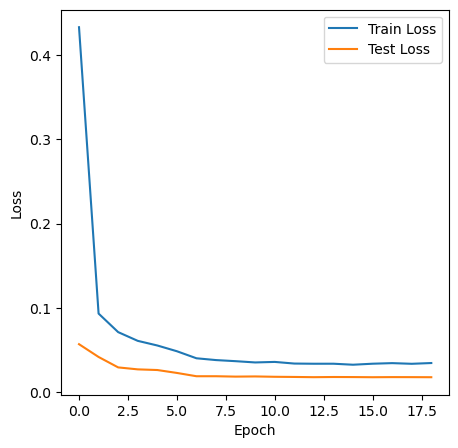

In [20]:
plot_loss(train_losses, test_losses)

In [21]:
from utils import plot_accuracy

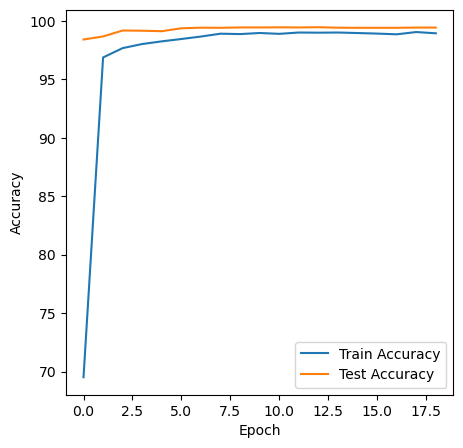

In [22]:
plot_accuracy(train_acc, test_acc)

Summary
=========
